In [5]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [6]:
# Generating random data
def generate_data(n_samples, time_steps):
    X = np.random.randn(n_samples, time_steps, 1)
    y = np.sin(np.sum(X, axis=1))
    return X, y

In [7]:
# Define LSTM model
def create_lstm_model(time_steps):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [8]:
# Generate sample data
n_samples = 1000
time_steps = 10
X_train, y_train = generate_data(n_samples, time_steps)
X_test, y_test = generate_data(n_samples // 10, time_steps)  # Using 10% of data for testing

# Reshaping data for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Creating LSTM model
model = create_lstm_model(time_steps)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
32/32 [==============================] - 2s 20ms/step - loss: 0.4929 - val_loss: 0.5110
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.4888 - val_loss: 0.5087
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.4890 - val_loss: 0.5123
Epoch 4/100
32/32 [==============================] - 0s 12ms/step - loss: 0.4877 - val_loss: 0.5100
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.4880 - val_loss: 0.5091
Epoch 6/100
32/32 [==============================] - 0s 11ms/step - loss: 0.4887 - val_loss: 0.5095
Epoch 7/100
32/32 [==============================] - 0s 14ms/step - loss: 0.4867 - val_loss: 0.5101
Epoch 8/100
32/32 [==============================] - 0s 9ms/step - loss: 0.4866 - val_loss: 0.5086
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 0.4864 - val_loss: 0.5087
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 0.4847 - val_loss: 0.5065
Epoch

Epoch 83/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0157 - val_loss: 0.0207
Epoch 84/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0141 - val_loss: 0.0197
Epoch 85/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0153 - val_loss: 0.0210
Epoch 86/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0164 - val_loss: 0.0189
Epoch 87/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0151 - val_loss: 0.0205
Epoch 88/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0135 - val_loss: 0.0166
Epoch 89/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0141 - val_loss: 0.0204
Epoch 90/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0145 - val_loss: 0.0193
Epoch 91/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0134 - val_loss: 0.0168
Epoch 92/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0130 - val_loss: 0.019

4/4 [==============================] - 0s 5ms/step - loss: 0.0147
Test Loss: 0.014719715341925621


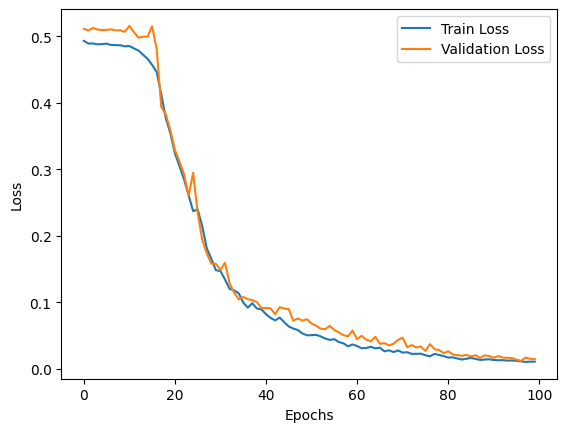

In [9]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()